In [5]:
# 1. сравнить вектора слов в двух версиях ВИМ
# 2. проверить (с помощью LSA) близость частей ВИМ в двух версиях

***Здесь я делаю придуманные самим же мной упражнения с применением Word2Vec и LSA. Сами идеи, которые я пытался реализовать, оказались (по большей части) концептуально неудачными, что я понял уже только после написания алгоритмов, но зато я смог потренироваться.***

**1. Вектора слов**

Стало интересно взять одинаковый набор текстов и сравнить векторы слов с их переводными вариантами. В качестве набора текстов — 4 тома "Войны и мира" на рус. и англ. 
Однако стоит учитывать некоторые допущения: 
- неизвестно, насколько "дословен" английский перевод;
- в английской версии переведены французские реплики.

In [2]:
!pip install spacy

     ---------------------------------------- 12.0/12.0 MB 2.2 MB/s eta 0:00:00
     -------------------------------------- 370.9/370.9 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.9 MB/s eta 0:00:00
  Using cached murmurhash-1.0.9-cp310-cp310-win_amd64.whl (18 kB)
  Using cached cymem-2.0.7-cp310-cp310-win_amd64.whl (29 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
     -------------------------------------- 481.6/481.6 kB 2.3 MB/s eta 0:00:00
  Using cached spacy_loggers-1.0.4-py3-none-any.whl (11 kB)
  Using cached wasabi-1.1.2-py3-none-any.whl (27 kB)
  Using cached pathy-0.10.2-py3-none-any.whl (48 kB)
  Using cached typer-0.9.0-py3-none-any.whl (45 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached preshed-3.0.8-cp310-cp310-win_amd64.whl (94 kB)
  Using cached typing_extensions-4.7.1-py3-none-any.whl (33 kB)
     ---------------------------------------- 1.7/1.7 MB 2.5 MB/s eta 0:00:00
     ------

In [4]:
!pip install gensim

     -------------------------------------- 67.1/67.1 kB 729.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20448 sha256=9246d44d06a52009fe19c93b1a065f58cce4f4a4ed595370143563c026e4d4c3
  Stored in directory: c:\users\vchemsmisl\appdata\local\pip\cache\wheels\01\02\ee\df0699282986903a384b69aab4413af9efd26b3612b5dccc9e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3522 sha256=a49caab1e12b2cda648d7093d7097d74de750723990c2c28f55f00dfab106b5b
  Stored in directory: c:\users\vchemsmisl\appdata\local\pip\cache\wheels\43\aa\48\5c66b931ff013ad19774081aa19656637af5c0cc33b5494b30
Successfully built fst-pso miniful


In [18]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 2.0 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [48]:
!python -m spacy download ru_core_news_sm

     ---------------------------------------- 15.3/15.3 MB 2.6 MB/s eta 0:00:00
     -------------------------------------- 55.4/55.4 kB 320.3 kB/s eta 0:00:00
  Using cached docopt-0.6.2-py2.py3-none-any.whl
  Using cached DAWG_Python-0.7.2-py2.py3-none-any.whl (11 kB)
     ---------------------------------------- 8.4/8.4 MB 1.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')


In [2]:
import spacy
import re
import en_core_web_sm, ru_core_news_sm

*препроцессинг текста*

In [41]:
def sentences_extraction(text: str) -> list:
    return re.split(r'((?<=\.|\?|!)|(?<=\?\"|!\"))\s+(?![а-я])', text)

def lemmatize(doc) -> list:
    sent = [token.lemma_ for token in doc if not token.is_stop and token and token.lemma_ != ' ' and token.lemma_ != '\n']
    return sent if len(sent) > 2 else None

In [103]:
def text_extraction_and_preprocessing(text_link: str, lang: str) -> list:
    with open(text_link, 'r', encoding='utf-8') as text_link:
        text = text_link.read()
    if lang == 'en':
        model = 'en_core_web_sm'
    if lang == 'ru':
        model = 'ru_core_news_sm'
    nlp = spacy.load(model, disable=['ner', 'parser'])
    
    sentences = sentences_extraction(text)
    pipeline = nlp.pipe(re.sub(r'[^\w\s]', '', sent).lower() for sent in sentences)
    return [lemmatize(doc) for doc in pipeline if lemmatize(doc)]  

In [5]:
eng_wap = text_extraction_and_preprocessing("C:/Users/vchemsmisl/Desktop/programming/war_and_peace.txt", 'en')
eng_wap[:50]

[['chapter',
  '\n',
  'prince',
  'genoa',
  'lucca',
  'family',
  'estate',
  'buonaparte'],
 ['warn',
  'not',
  'tell',
  'mean',
  'war',
  'try',
  'defend',
  'infamy',
  'horror',
  'perpetrate',
  'antichrist',
  'believe',
  'antichrist',
  'long',
  'friend',
  'long',
  'faithful',
  'slave'],
 ['frighten',
  'sit',
  'tell',
  'news',
  '\n',
  'july',
  '1805',
  'speaker',
  'wellknown',
  'anna',
  'pávlovna',
  'schérer',
  'maid',
  'honor',
  'favorite',
  'empress',
  'márya',
  'fëdorovna'],
 ['word',
  'greet',
  'prince',
  'vasíli',
  'kurágin',
  'man',
  'high',
  'rank',
  'importance',
  'arrive',
  'reception'],
 ['anna', 'pávlovna', 'cough', 'day'],
 ['say', 'suffer', 'la', 'grippe', 'grippe', 'new', 'word', 'st'],
 ['invitation',
  'exception',
  'write',
  'french',
  'deliver',
  'scarletliveried',
  'footman',
  'morning',
  'run',
  'follow',
  '\n',
  'well',
  'count',
  'prince',
  'prospect',
  'spend',
  'evening',
  'poor',
  'invalid',
  'terr

In [6]:
rus_wap = text_extraction_and_preprocessing("C:/Users/vchemsmisl/Desktop/programming/voina_i_mir.txt", 'ru') 
rus_wap[-10]

['сторона',
 'являться',
 'страх',
 'жалость',
 'век',
 'воздвигнутое',
 'здание',
 'страсть',
 'разрушение']

*штука, которая позволит объединять некоторые сочетания слов, которые обозначают одно понятие, в один токен:*

*например, имя и фамилию*

In [7]:
from gensim.models.phrases import Phrases, Phraser

In [8]:
eng_phrases = Phrases(eng_wap, min_count=20)
eng_bigram = Phraser(eng_phrases)
eng_phrases.find_phrases(eng_wap)

{'anna_pávlovna': 492.92915503154416,
 'prince_vasíli': 72.76153651854587,
 'kiss_hand': 10.75022104332449,
 '\n_oh': 11.547535320913184,
 'not_understand': 10.791568047337277,
 'emperor_alexander': 43.984237726098186,
 'close_eye': 15.88086019498997,
 'princess_mary': 138.54257871724064,
 'thousand_ruble': 142.96394504769333,
 'drawing_room': 175.81813125695217,
 'prince_vasílis': 27.45664563768012,
 'little_princess': 17.92049445397915,
 'thank_god': 33.4582800982801,
 'old_man': 17.038053385228686,
 'young_man': 21.318087913547938,
 'look_round': 17.23102194818939,
 'turn_away': 26.1066919316855,
 'expression_face': 13.170767564221602,
 'enter_room': 16.549682395644282,
 'prince_hippolyte': 15.92485446985447,
 'dear_fellow': 91.40131118881119,
 'shrug_shoulder': 473.26876737720113,
 'prince_andrew': 81.37342064347794,
 'anna_mikháylovna': 474.44431171786124,
 'will_not': 130.5233325219085,
 'commander_chief': 237.90615635761884,
 'yes_yes': 26.267350796651364,
 'long_time': 21.93152

In [9]:
rus_phrases = Phrases(rus_wap, min_count=20)
rus_bigram = Phraser(rus_phrases)
rus_phrases.find_phrases(rus_wap)

{'eh_bien': 375.55168269230774,
 'de_la': 41.93398054343505,
 'je_vous': 93.89497408158665,
 'je_ne': 111.90222938490464,
 'que_je': 71.81417797888386,
 'анна_павловна': 509.6454626334519,
 'князь_василий': 85.13010090817356,
 'анна_павлович': 261.0220039095785,
 'à_la': 35.488269080996886,
 'анна_павловны': 191.3038686717943,
 'император_александр': 165.14595806336968,
 'закрыть_глаз': 50.118736842105264,
 '\n_3': 81.11418558306801,
 '\n_4': 68.9943693207183,
 '\n_2': 92.10584350084979,
 'je_suis': 153.16617647058823,
 'взять_рука': 23.007068698917607,
 'маленький_княгиня': 243.02686438856654,
 'князь_ипполит': 23.12175580221998,
 'слава_бог': 29.120130475302886,
 'ни_разу': 78.54675716440423,
 'молодой_человек': 36.00013001385757,
 'граф_безухов': 22.223709077607754,
 'первый_раз': 61.227137365314846,
 'выражение_лицо': 24.223374243259396,
 'разный_сторона': 69.62098930481282,
 'опустить_глаз': 21.36471794871795,
 'друг_друга': 455.80153394992107,
 'князь_андрей': 98.41887581453419,


In [10]:
eng_sents = eng_bigram[eng_wap]
rus_sents = rus_bigram[rus_wap]

*игры с вортувеками*

In [11]:
from gensim.models import Word2Vec

In [12]:
eng_vectors = Word2Vec(min_count=20, 
                       vector_size=200, 
                       window=3)
eng_vectors.build_vocab(eng_sents)
eng_vectors.train(eng_sents, total_examples=eng_vectors.corpus_count, epochs=20)

(3464982, 4672300)

In [13]:
rus_vectors = Word2Vec(min_count=20, 
                       vector_size=200, 
                       window=3)
rus_vectors.build_vocab(rus_sents)
rus_vectors.train(rus_sents, total_examples=rus_vectors.corpus_count, epochs=20)

(3116394, 4873420)

*пытаюсь сравнить синонимичные эквивалентны*

In [14]:
from collections import Counter

In [15]:
# достаю частоты слов в обеих версиях ВиМ
eng_words = [word for sent in eng_sents for word in sent]
eng_words_count = dict(Counter(eng_words))
eng_words_sort = sorted(eng_words_count, key=lambda a: eng_words_count[a], reverse=True)

In [16]:
rus_words = [word for sent in rus_sents for word in sent]
rus_words_count = dict(Counter(rus_words))
rus_words_sort = sorted(rus_words_count, key=lambda a: rus_words_count[a], reverse=True)

*можно сравнить первые 10 нарицательных синонимов*

In [17]:
eng_words_sort[:20]

['\n',
 'say',
 'pierre',
 'man',
 'come',
 'know',
 'look',
 'go',
 'natásha',
 'face',
 'think',
 'prince_andrew',
 'time',
 'see',
 'ask',
 'begin',
 'feel',
 'not',
 'tell',
 'eye']

In [18]:
rus_words_sort[:20]

['сказать',
 'говорить',
 'пьер',
 'человек',
 '\u2003\n',
 'лицо',
 'знать',
 'князь_андрей',
 'наташа',
 'рука',
 'время',
 'ни',
 'глаз',
 'дело',
 'видеть',
 'думать',
 'слово',
 '\n',
 'ростов',
 'жизнь']

In [31]:
import numpy as np
from numpy.linalg import norm
from numpy import dot

In [20]:
def cosine_sim(vec1: numpy.ndarray, vec2: numpy.ndarray) -> float:
    return dot(vec1, vec2) / norm(vec1)*norm(vec2)

In [21]:
rus_vectors.wv.similarity('сказать', 'говорить')

0.6525769

In [53]:
vec1 = rus_vectors.wv.get_vector('сказать')
vec2 = rus_vectors.wv.get_vector('говорить')
cosine_sim(vec1, vec2)

0.6113594

In [51]:
# отбираю слова вручную, так как, хотя многие и совпадают, располагаются по частоте слова по-разному
# плюс есть несколько эквивалентов одному слову
vec_rus1 = rus_vectors.wv.get_vector('сказать')
vec_eng1 = eng_vectors.wv.get_vector('say')
print(f'сказать/say: {cosine_sim(vec_rus1, vec_eng1)}')

vec_rus2 = rus_vectors.wv.get_vector('говорить')
vec_eng2 = eng_vectors.wv.get_vector('tell')
print(f'говорить/tell: {cosine_sim(vec_rus2, vec_eng2)}')

vec_rus3 = rus_vectors.wv.get_vector('человек')
vec_eng3 = eng_vectors.wv.get_vector('man')
print(f'человек/man: {cosine_sim(vec_rus3, vec_eng3)}')

vec_rus4 = rus_vectors.wv.get_vector('лицо')
vec_eng4 = eng_vectors.wv.get_vector('face')
print(f'лицо/face: {cosine_sim(vec_rus4, vec_eng4)}')

vec_rus5 = rus_vectors.wv.get_vector('знать')
vec_eng5 = eng_vectors.wv.get_vector('know')
print(f'знать/know: {cosine_sim(vec_rus5, vec_eng5)}')

vec_rus6 = rus_vectors.wv.get_vector('думать')
vec_eng6 = eng_vectors.wv.get_vector('think')
print(f'думать/think: {cosine_sim(vec_rus6, vec_eng6)}')

vec_rus7 = rus_vectors.wv.get_vector('время')
vec_eng7 = eng_vectors.wv.get_vector('time')
print(f'время/time: {cosine_sim(vec_rus7, vec_eng7)}')

vec_rus8 = rus_vectors.wv.get_vector('видеть')
vec_eng8 = eng_vectors.wv.get_vector('see')
print(f'видеть/see: {cosine_sim(vec_rus8, vec_eng8)}')

vec_rus9 = rus_vectors.wv.get_vector('глаз')
vec_eng9 = eng_vectors.wv.get_vector('eye')
print(f'глаз/eye: {cosine_sim(vec_rus9, vec_eng9)}')

vec_rus10 = rus_vectors.wv.get_vector('слово')
vec_eng10 = eng_vectors.wv.get_vector('word')
print(f'слово/word: {cosine_sim(vec_rus10, vec_eng10)}')

сказать/say: 0.2713298797607422
говорить/tell: 0.19804313778877258
человек/man: 0.29598453640937805
лицо/face: -0.008438773453235626
знать/know: 0.23900270462036133
думать/think: 0.17124046385288239
время/time: -0.04893554747104645
видеть/see: 0.021602217108011246
глаз/eye: 0.02913137897849083
слово/word: 0.04677365720272064


То есть всё-таки в двух разных моделях семантика слова представляется в векторах по-разному

In [59]:
# ради интереса решил посмотреть, как две модели предсказывают контекст для слова: похожие ли там по значению слова?
# кажется очевидным, что да

rus_vectors.wv.most_similar('слово')

[('повторять', 0.6359119415283203),
 ('речь', 0.634246826171875),
 ('ответ', 0.6056280136108398),
 ('значение', 0.5995104908943176),
 ('честной', 0.5737476944923401),
 ('понять', 0.5655015110969543),
 ('ответить', 0.5232985019683838),
 ('непонятный', 0.5210738182067871),
 ('бессмысленный', 0.5191851258277893),
 ('резкий', 0.51470947265625)]

In [58]:
eng_vectors.wv.most_similar('word')

[('utter', 0.5895079374313354),
 ('distinctly', 0.5688621401786804),
 ('phrase', 0.5597217082977295),
 ('prayer', 0.555141806602478),
 ('speech', 0.5416110157966614),
 ('explanation', 0.5054444074630737),
 ('approval', 0.4876050353050232),
 ('clearly', 0.4789658784866333),
 ('hardly', 0.4698318541049957),
 ('story', 0.4680580496788025)]

Видимо, всё-таки достаточно разные, по крайней мере в нескольких примерах

*теперь интересно посмотреть близость (главных) героев романа в обеих версиях*

Пьер, Андрей Болконский, Наташа, старый князь, Мария Болконская, mlle Bourienne, Элен Курагина, Анатоль, князь Василий, Анна Шерер, Наполеон, Кутузов, Александр 1, Багратион, Долохов

In [29]:
# сначала для русской версии

rus_pierre = rus_vectors.wv.get_vector('пьер')
rus_andrew = rus_vectors.wv.get_vector('князь_андрей')
rus_natasha = rus_vectors.wv.get_vector('наташа')
rus_old_prince = rus_vectors.wv.get_vector('николай_андреевич')
rus_mary = rus_vectors.wv.get_vector('княжна_марья')
rus_mlle = rus_vectors.wv.get_vector('mlle_bourienne')
rus_helene = rus_vectors.wv.get_vector('элен')
rus_anatole = rus_vectors.wv.get_vector('анатоль')
rus_vasilii = rus_vectors.wv.get_vector('князь_василий')
rus_sherer = rus_vectors.wv.get_vector('анна_павловна')
rus_napoleon = rus_vectors.wv.get_vector('наполеон')
rus_alexander = rus_vectors.wv.get_vector('император_александр')
rus_bagration = rus_vectors.wv.get_vector('князь_багратион')
rus_kutuzov = rus_vectors.wv.get_vector('кутузов')
rus_dolohov = rus_vectors.wv.get_vector('долохов')

In [34]:
rus_all_persons = np.array([rus_pierre, rus_andrew, rus_natasha, rus_old_prince,
                           rus_mary, rus_mlle, rus_helene, rus_anatole, rus_vasilii,
                           rus_sherer, rus_napoleon, rus_alexander, rus_bagration, rus_kutuzov, rus_dolohov])

In [36]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=10)
rus_all_persons_transformed = tsne.fit_transform(rus_all_persons)

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
rus_df = pd.DataFrame({'names': 
                       ['Пьер', 'Князь Андрей', 'Наташа', 'Старый князь', 'Княжна Марья', 'Mlle Bourienne', 
                       'Элен', 'Анатоль', 'Князь Василий', 'Анна Шерер', 
                        'Наполеон', 'Александр I', 'Багратион', 'Кутузов', 'Долохов'], 
                       'x': rus_all_persons_transformed[:, 0], 
                       'y': rus_all_persons_transformed[:, 1]})
rus_df

,names,x,y
0,Пьер,-24.852365,-38.588814
1,Князь Андрей,-20.735931,-19.669607
2,Наташа,-85.853561,5.562587
3,Старый князь,-78.613861,-25.590151
4,Княжна Марья,-53.316330,-46.555573
5,Mlle Bourienne,-60.472324,-5.509190
6,Элен,-38.032974,-0.180873
7,Анатоль,-45.171207,-21.064581
8,Князь Василий,-54.563801,13.755341
9,Анна Шерер,-35.446262,24.188362


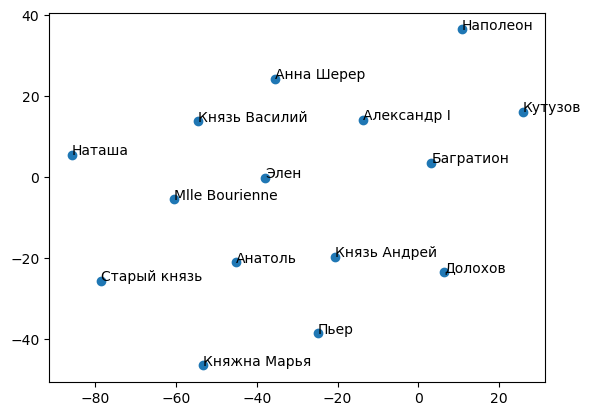

In [46]:
fig, ax = plt.subplots()
ax.scatter(rus_df['x'], rus_df['y'])
for idx, text in enumerate(rus_df['names']):
    ax.annotate(text, (rus_df['x'][idx], rus_df['y'][idx]))

In [47]:
# проверочка на то, влияет ли скейлинг на расстояния

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_rus_df = scaler.fit_transform(rus_df[['x', 'y']])

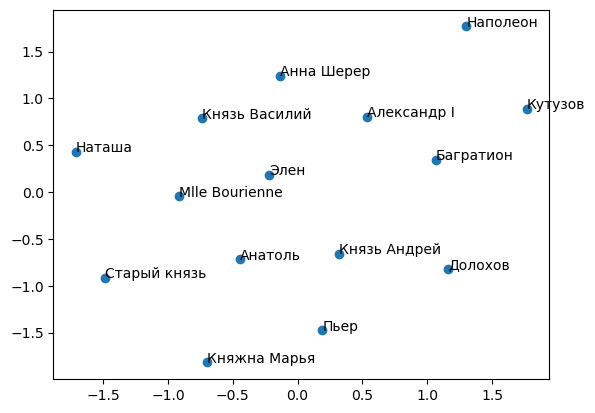

In [49]:
fig, ax = plt.subplots()
ax.scatter(scaled_rus_df[:, 0], scaled_rus_df[:, 1])
for idx, text in enumerate(rus_df['names']):
    ax.annotate(text, (scaled_rus_df[:, 0][idx], scaled_rus_df[:, 1][idx]))

In [54]:
# теперь для английской версии

eng_pierre = eng_vectors.wv.get_vector('pierre')
eng_andrew = eng_vectors.wv.get_vector('prince_andrew')
eng_natasha = eng_vectors.wv.get_vector('natásha')
eng_old_prince = eng_vectors.wv.get_vector('old_prince')
eng_mary = eng_vectors.wv.get_vector('princess_mary')
eng_mlle = eng_vectors.wv.get_vector('mademoiselle_bourienne')
eng_helene = eng_vectors.wv.get_vector('hélène')
eng_anatole = eng_vectors.wv.get_vector('anatole')
eng_vasilii = eng_vectors.wv.get_vector('prince_vasíli')
eng_sherer = eng_vectors.wv.get_vector('anna_pávlovna')
eng_napoleon = eng_vectors.wv.get_vector('napoleon')
eng_alexander = eng_vectors.wv.get_vector('emperor_alexander')
eng_bagration = eng_vectors.wv.get_vector('prince_bagratión')
eng_kutuzov = eng_vectors.wv.get_vector('kutúzov')
eng_dolohov = eng_vectors.wv.get_vector('dólokhov')

In [58]:
eng_all_persons = np.array([eng_pierre, eng_andrew, eng_natasha, eng_old_prince,
                           eng_mary, eng_mlle, eng_helene, eng_anatole, eng_vasilii,
                           eng_sherer, eng_napoleon, eng_alexander, eng_bagration, eng_kutuzov, eng_dolohov])
names = ['Пьер', 'Князь Андрей', 'Наташа', 'Старый князь', 'Княжна Марья', 'Mlle Bourienne', 
                       'Элен', 'Анатоль', 'Князь Василий', 'Анна Шерер', 
                        'Наполеон', 'Александр I', 'Багратион', 'Кутузов', 'Долохов']

In [56]:
tsne = TSNE(perplexity=10)
eng_all_persons_transformed = tsne.fit_transform(eng_all_persons)

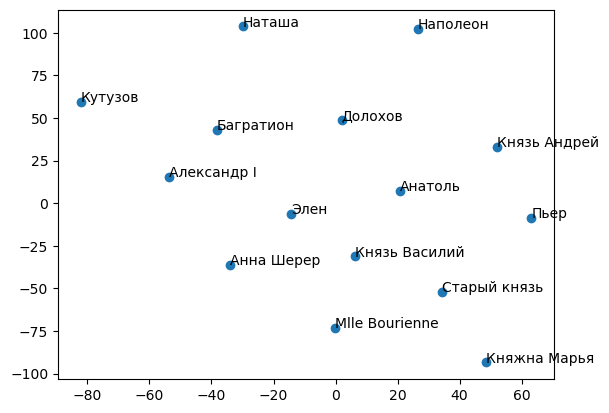

In [59]:
fig, ax = plt.subplots()
ax.scatter(eng_all_persons_transformed[:, 0], eng_all_persons_transformed[:, 1])
for idx, text in enumerate(names):
    ax.annotate(text, (eng_all_persons_transformed[:, 0][idx], eng_all_persons_transformed[:, 1][idx]))

Получается интересно, что в обоих графиках более-менее выделяются кластеры, соответствующие группам героев в произведении (исторические личности-полководцы, семья Курагиных+Анна Шерер, семья Болконских и отдельно Наташа), однако располагаются они по-разному (ну, что логично) и встречаются отдельные отличия: в англ. версии Наполеон не входит в группу к русским полководцам, Наташа оказывается ближе к историческим персонажам, чем к семьям Болконских и Курагиных.

**2. LSA на главах Война и мир**

In [70]:
import numpy as np

In [114]:
def text_split_and_preprocessing(text_link: str, lang: str) -> list:
    with open(text_link, 'r', encoding='utf-8') as text_link:
        text = text_link.read()
    if lang == 'en':
        model = 'en_core_web_sm'
        texts_list = re.split(r'BOOK \w+:', text)
        texts_list.extend(re.split(r'\w+ EPILOGUE', texts_list[-1]))
    if lang == 'ru':
        model = 'ru_core_news_sm'
        texts_list = re.split(r'ЧАСТЬ \w+', text)
       
    nlp = spacy.load(model, disable=['ner', 'parser'])
    nlp.max_length = 3000000
    
    pipeline = nlp.pipe(re.sub(r'[^\w\s]', '', txt).lower() for txt in texts_list)
    return [' '.join(lemmatize(doc)) for doc in pipeline if lemmatize(doc)] 

In [ ]:
corpus = text_split_and_preprocessing("C:/Users/vchemsmisl/Desktop/programming/war_and_peace.txt", 'en')

In [82]:
# я слишком поздно заметил, что два текста в корпусе совпали
del corpus[-4]

In [83]:
len(corpus)

17

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus).todense().T

In [85]:
from numpy.linalg import svd

U, S, Vt = svd(tfidf_matrix)

In [86]:
U.shape, S.shape, Vt.shape

((13621, 13621), (17,), (17, 17))

In [87]:
# двумерное сингулярное разложение векторов частей романа
Vt_2D = np.array(Vt[:, :2])
Vt_2D

array([[-0.2627785 , -0.22896735],
       [ 0.21591113, -0.20271491],
       [-0.02265185, -0.39933555],
       [ 0.23878435,  0.15117386],
       [-0.01148692, -0.35167399],
       [ 0.19954711, -0.07422933],
       [-0.0815235 , -0.33820305],
       [ 0.20573678, -0.25356426],
       [-0.14195279,  0.19136386],
       [ 0.03051348,  0.09903187],
       [-0.4811974 ,  0.45960084],
       [ 0.08071256,  0.01105025],
       [-0.18792243, -0.1078428 ],
       [-0.21137946, -0.25119745],
       [-0.31517026, -0.06410552],
       [ 0.54595086,  0.2384611 ],
       [-0.03655403,  0.15103492]])

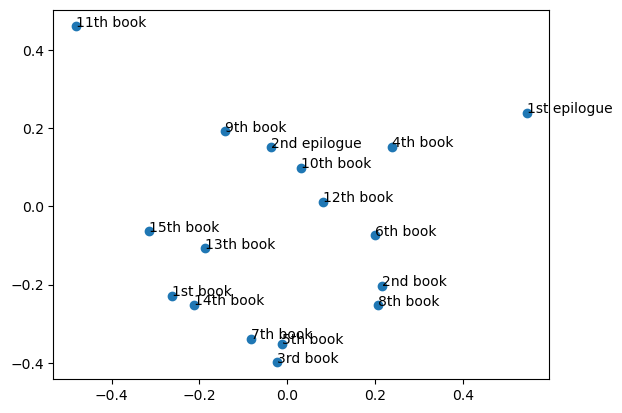

In [90]:
import matplotlib.pyplot as plt

books = ['1st book', '2nd book', '3rd book', '4th book', 
         '5th book', '6th book', '7th book', '8th book', 
         '9th book', '10th book', '11th book', '12th book', 
         '13th book', '14th book', '15th book', '1st epilogue', '2nd epilogue']
fig, ax = plt.subplots()
ax.scatter(Vt_2D[:, 0], Vt_2D[:, 1])
for i, t in enumerate(books):
    ax.annotate(t, (Vt_2D[i, 0], Vt_2D[i, 1]))
    
plt.show()

К сожалению, плохо получается оценить правильность алгоритма и результата, так как близость тех или иных частей романа не удаётся объяснить их тематикой (возможно, в том числе потому, что в одном тексте может встречаться несколько тем: например, "филосовские главы" находятся в тех же частях, что сюжетные). 

In [115]:
rus_corpus = text_split_and_preprocessing("C:/Users/vchemsmisl/Desktop/programming/voina_i_mir.txt", 'ru') 

In [154]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(rus_corpus).todense().T

In [155]:
U, S, Vt = svd(tfidf_matrix)

In [156]:
Vt_2D = np.array(Vt[:, :2])

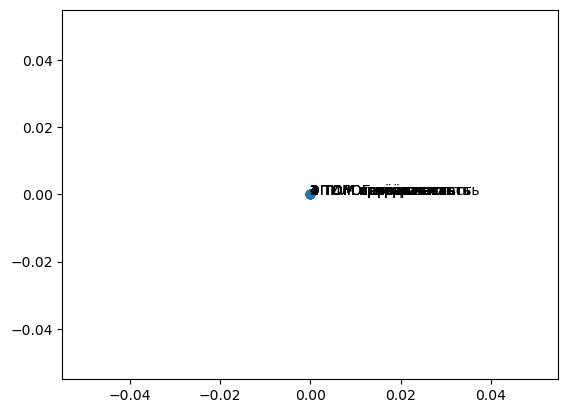

In [157]:
books = ['1 ТОМ первая часть', '1 ТОМ вторая часть', '1 ТОМ третья часть', '2 ТОМ первая часть', 
         '2 ТОМ вторая часть', '2 ТОМ третья часть', '2 ТОМ четёртая часть', '2 ТОМ пятая часть', 
         '3 ТОМ первая часть', '3 ТОМ вторая часть', '3 ТОМ третья часть', '4 ТОМ первая часть', 
         '4 ТОМ вторая часть', '4 ТОМ третья часть', '4 ТОМ четвёртая часть', 
         'ЭПИЛОГ первая часть', 'ЭПИЛОГ вторая часть']
fig, ax = plt.subplots()
ax.scatter(Vt_2D[:, 0], Vt_2D[:, 1])
for i, t in enumerate(books):
    ax.annotate(t, (Vt_2D[i, 0], Vt_2D[i, 1]))

О как...

Ну в общем, эксперимент удался плохо). Пожалуй, из-за того, что тексты частей одного романа всё-таки близки, содержат схожую лексику в примерно равных частотах.